

```
# 코드로 형식 지정됨
```

# MNIST 데이터를 사용하여 Deep learning

개발 환경
Google Colab

tensorflow==2.6.0

## tensorflow 불러오기  
`import tensorflow as tf`를 사용하여 tensorflow를 tf로 사용합니다.(파이썬 문법)  
우리는 tensorflow 중에서 **keras**를 사용하여 모델을 만들어 보겠습니다.

먼저 이미지 구글 드라이브에 넣은 이미지 데이터를 동기화합니다.


In [5]:
import tensorflow as tf
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import *
from nltk.tokenize import word_tokenize  

ModuleNotFoundError: No module named 'tensorflow.keras'

### 다음은 python을 사용하는데 필요한 라이브러리를 호출합니다.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

### MNIST는 사람의 손글씨를 모아 놓은 데이터 입니다.  
![이미지](https://www.researchgate.net/profile/Alexandra-Suvorikova-2/publication/314797421/figure/fig3/AS:471285672222725@1489374668587/Random-sample-from-MNIST-database.png)

훈련 데이터 6만개, 테스트 데이터 1만개로 구성되어 있으며 tensorflow의 내장 함수를 사용하여 쉽게 불러올 수 있습니다.  
각 데이터는 2차원의 이미지 형태 이며, 가로 28픽셀 세로 28픽셀로 28x28데이터 입니다.  
각 데이터 포인트는 0~255사이 값을 가지고 있습니다.

In [ ]:
mnist = tf.keras.datasets.mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

Deep learning을 할 때 데이터가 0\~1 사이의 값을 가지는 것이 학습이 잘됩니다.  
따라서 학습 데이터를 최대값 255로 나누어서 0\~1 사이 값을 가지도록 만듭니다.

## Deep learning 모델 만들기  
처음으로 만들 모델은 일반적인 Neural network(Dense layer)으로 구성된 모델을 만들어 보겠습니다.  
![softmax-regression-scalargraph.png](https://tensorflowkorea.gitbooks.io/tensorflow-kr/g3doc/images/softmax-regression-scalargraph.png)  
128개의 노드로 구성된 Dense layer(또는 Fully connected layer) 1개와 Dropout layer 1개를 사용하여 만들어 보겠습니다.  

우리의 input 데이터는 2차원의 그림입니다.  
따라서 Dense layer에 넣어주기 위해서는 1차원으로 만들어야 합니다.  
Flatten layer를 사용하면 2차원의 28x28이미지를 784의 1차원 데이터로 만들 수 있습니다.

In [ ]:
x = Input(shape = (28,28))
dense_model = Flatten()(x)
dense_model = Dense(128,activation='relu')(dense_model)
dense_model = Dropout(0.2)(dense_model)
y = Dense(10, activation='softmax')(dense_model)

model = Model(x,y)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


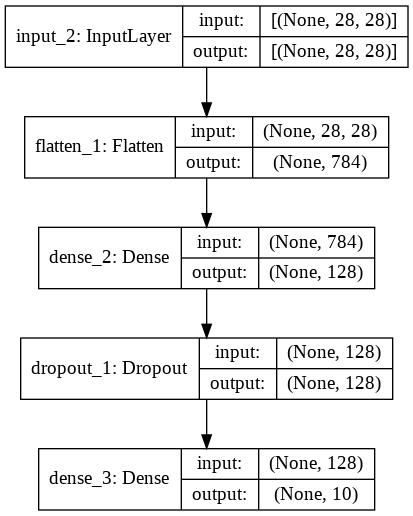

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

### 모델 컴파일
keras는 모델을 컴파일 해주는 과정을 거칩니다.  
컴파일하면서 최적화 함수(optimize 함수)와 손실 함수(loss function)을 지정해 줍니다.

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### 학습
fit 명령어를 통해서 학습을 시작합니다.  
batch size는 한번에 학습할 데이터 개수를 지정해 줍니다.  
batch size가 커지면 한번에 계산해야할 데이터 개수가 커서 메모리가 부족할 수 있습니다.  
반대로 batch size가 작아지면 여러번 계산해야 하므로 학습 속도가 느려집니다.  
batch size가 작아야(100언저리) 학습이 잘된다는 논문도 있고 batch size가 커도 학습이 잘되게 할 수 있다는 논문도 있습니다.

In [ ]:
model.fit(x_train, y_train, epochs=5, batch_size=100)

Epoch 1/5
600/600 [==============================] - 2s 3ms/step - loss: 0.3781 - accuracy: 0.8913
Epoch 2/5
600/600 [==============================] - 2s 3ms/step - loss: 0.1846 - accuracy: 0.9460
Epoch 3/5
600/600 [==============================] - 2s 3ms/step - loss: 0.1401 - accuracy: 0.9596
Epoch 4/5
600/600 [==============================] - 2s 3ms/step - loss: 0.1138 - accuracy: 0.9659
Epoch 5/5
600/600 [==============================] - 2s 3ms/step - loss: 0.0969 - accuracy: 0.9713


### 모델 평가
test 데이터를 사용하여 모델을 평가해 보겠습니다.

In [ ]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - loss: 0.0898 - accuracy: 0.9720


[0.08981394022703171, 0.972000002861023]

### 테스트 데이터에 대해서 97%의 정확도를 보입니다.

#### 실제 이미지와 결과를 확인해 보겠습니다.

In [ ]:
model_predicted = model.predict(x_test, verbose=0).argmax(axis = 1)

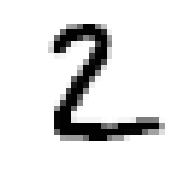

Predicted value :  2


In [ ]:
num = 1
fig = plt.figure(figsize = (10,3))
image = x_test[num]
plt.imshow(image,cmap='Greys')
plt.axis('off')
plt.show()
print("Predicted value : ", model_predicted[num])

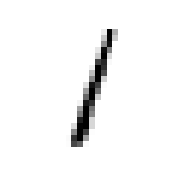

Predicted value :  1


In [ ]:
num = 2
fig = plt.figure(figsize = (10,3))
image = x_test[num]
plt.imshow(image,cmap='Greys')
plt.axis('off')
plt.show()
print("Predicted value : ", model_predicted[num])

## 다음은 CNN을 사용하여 모델을 만들어 보겠습니다.  
![network.png](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FXuxs1%2FbtqyPUT7Tb7%2FIKHaaB04k2mDl2O97CmXs1%2Fimg.png)

CNN 모델은 2차원 데이터는 2차원 형태로 분석하고자 하는 것입니다.  
과거 이미지 처리에서 사용한 mask를 사용하여 이미지를 분석하던 것과 비슷한 방법입니다.
![img_processing_mask.jpg](http://what-when-how.com/wp-content/uploads/2011/09/tmp6139_thumb_thumb.jpg)

CNN은 이 mask를 deep learning을 사용하여 학습해 보는 것입니다.

### 데이터 변환
먼저 CNN을 사용하기 위해서는 3차원 데이터 형태로 만들어야 합니다.  
2차원으로 각 데이터의 위치를 지정해주고 데이터의 값 차원을 추가해서 총 3차원으로 만듭니다.  
![99DE9B3D5AD70ABB05.png](https://mblogthumb-phinf.pstatic.net/MjAxODA3MTFfNTgg/MDAxNTMxMjU5MzAzNzc0.9h8UZP06uPi3i3YTbLu7Ycjm2HL1D6E4lAljUX4pjCog.nQremMmeKZfwbAHgSzuV5urPioVywK0zSFPqODIwTcYg.PNG.dpfkdlt/image.png?type=w800)

In [ ]:
train_img = x_train.reshape((-1,28,28,1))
test_img = x_test.reshape((-1,28,28,1))

### CNN 모델을 만듭니다.  
**CNN layer + MaxPooling layer + Dropout layer**를 1개의 셋트로 총 2개 만들고  
최종 결과를 출력하기 위해서 Flatten layer와 Dense layer를 통해 판별합니다.

In [ ]:
CNN_input = Input(shape = (28,28,1))
CNN = Conv2D(64,(3,3),activation='relu')(CNN_input)
CNN = MaxPool2D((2,2))(CNN)
CNN = Dropout(0.4)(CNN)
CNN = Conv2D(128,(3,3),activation='relu')(CNN)
CNN = MaxPool2D((2,2))(CNN)
CNN = Dropout(0.4)(CNN)
CNN = Flatten()(CNN)
CNN = Dense(10,activation='softmax')(CNN)
CNN_model = Model(CNN_input,CNN)
CNN_model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 5, 5, 128)         0   

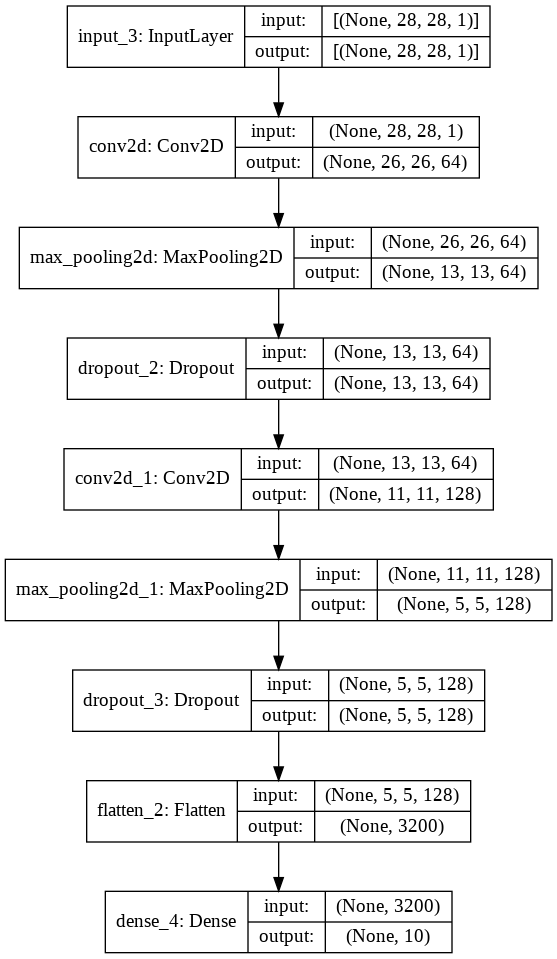

In [ ]:
tf.keras.utils.plot_model(CNN_model, show_shapes=True)

#### 동일하게 컴파일 해주고 학습을 시작합니다.  

In [ ]:
CNN_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
CNN_model.fit(train_img,y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 122s 65ms/step - loss: 0.1770 - accuracy: 0.9455
Epoch 2/5
1875/1875 [==============================] - 121s 64ms/step - loss: 0.0688 - accuracy: 0.9788
Epoch 3/5
1875/1875 [==============================] - 121s 64ms/step - loss: 0.0537 - accuracy: 0.9833
Epoch 4/5
1875/1875 [==============================] - 121s 65ms/step - loss: 0.0445 - accuracy: 0.9859
Epoch 5/5
1875/1875 [==============================] - 121s 65ms/step - loss: 0.0408 - accuracy: 0.9869


In [ ]:
CNN_model.evaluate(test_img,  y_test, verbose=2)

313/313 - 4s - loss: 0.0277 - accuracy: 0.9911


[0.02767210640013218, 0.991100013256073]

### 정확도가 많이 증가했습니다.
### 99%!!!

In [ ]:
CNN_model_predicted = CNN_model.predict(test_img, verbose=0).argmax(axis = 1)

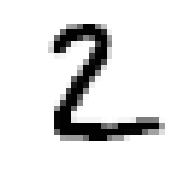

Predicted value :  2


In [ ]:
num = 1
fig = plt.figure(figsize = (10,3))
image = x_test[num]
plt.imshow(image,cmap='Greys')
plt.axis('off')
plt.show()
print("Predicted value : ",CNN_model_predicted[num])

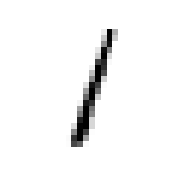

Predicted value :  1


In [ ]:
num = 2
fig = plt.figure(figsize = (10,3))
image = x_test[num]
plt.imshow(image,cmap='Greys')
plt.axis('off')
plt.show()
print("Predicted value : ", CNN_model_predicted[num])